# Data Bootcamp Final Project:
## Education and Income Inequality in New York State

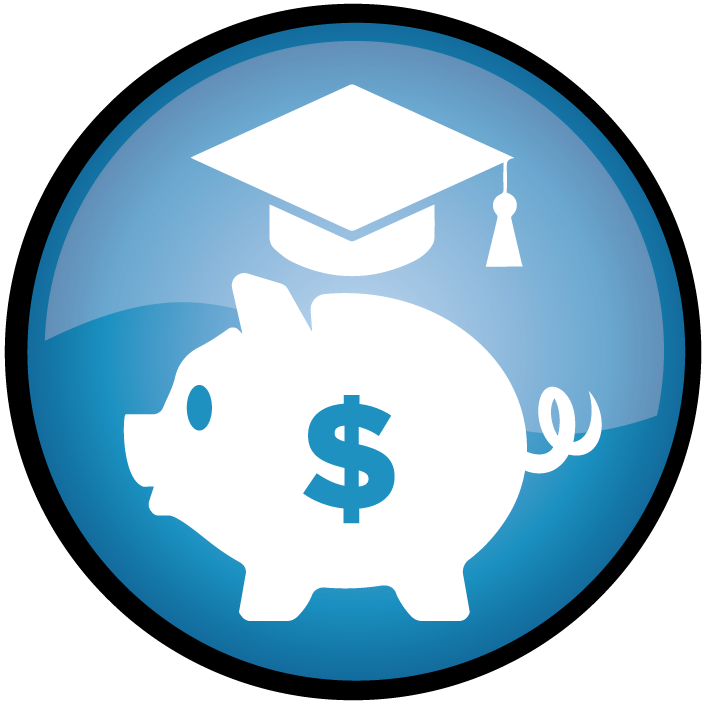

In [339]:
from IPython.display import Image
Image("/Users/studentgovernment/Desktop/piggy bank.png", width=200, height=200)

#### Author: Oatile Ramsay

Email: oor207@stern.nyu.edu

NYU ID: N12436886

Date: Thursday, December 21, 2017

In my time at NYU, I have deveoped an interest in emerging markets and economic mobility. Essentially, what are some of the factors that would contribute to overall economic growth in a way that does isolate lower earning communities? The topic of inclusive growth is vast for each individual community, however at a very basic level I had always believed the irradication of inequality would begin with education. However, it may not be that simple.In a study Economist, Jesse Rothstein from UC Berkely found 'little evidence to support [this] premise.' (refer to article below)

https://www.theatlantic.com/education/archive/2017/09/education-and-economic-mobility/541041/

The overall question of inclusive growth would be too grand for the scope of this project. Instead, I aim to identify the correlation between education and income inequality, and how it may affect economic mobility. 

#### Sampling
Geography: New York is often associated with the American dream - the idea that anyone could become 'something' from 'nothing'.  

Education: I have decided to focus on high school education for three major reasons. Firstly, higher eductaion institutes are more likely enroll students from all over the globe. Therefore, using them as samples may not be a true reflection of the local communities they exist in. Secondly, more people enroll in high school than college. Lastly, high schools allow for easier compariosn due to standard testing (SATs).

#### Index
The project will go through the following stages:
- Importing relevant data on New York State education and income
- Preparing and cleaning the data
- Discuss the tools, packages and methods used to clean and analyse the data
- Mapping the data
- Summmarizing my findings


### Data Report

The data used will be imported from two sites.
- The data on SAT scores by County will be imported from Syracuse.com: goo.gl/VumBfm (link)
- The data on income per family will be imported from Wikipedia      : goo.gl/ctpqVt (link)

Unfortunately, there is no direct link to download the data from either site. Additionally, the data is mixed in with other content from the website. Therefore to extract the data, I will copy and paste the tables from the websites to an excel sheet on my local harddrive. From there, I can import the data using the pd.read_excel() tool. This method is limited however will work for this project as the databases are relatively small (there are only 62 County's in New York State). Had the databases been too large, the process may have been tedious.

### Packages Used:


- Display package 
- Pandas package 
- Matplotlib package
- numpy 
- Basemap 
- statsmodels 
- geopandas 
- shapely 

In [276]:
from IPython.display import display, Image 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from mpl_toolkits.basemap import Basemap

import statsmodels.api as sm
import statsmodels.formula.api as smf


from bokeh.io import output_notebook 
from bokeh.plotting import show, figure 

from bokeh.models import (
     ColumnDataSource,   
     HoverTool,          
     LogColorMapper      
)

output_notebook()

Loading BokehJS ...

### Step 1: Importing data on SAT scores

This data will be imported from Syracuse.com as mentioned above.

In [277]:
url= "/Users/studentgovernment/Desktop/SAT_scores_county.xlsx"
scores= pd.read_excel(url)

In [278]:
scores.head(10) #Done to check what the imported data looks like

,Search again,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Name,Number SAT test takers,SAT score (reading/math combined),reading average,math average,Graduation rate,Number enrolled,County
1,Yorktown Central School District,253,1091,533,558,0.95,313,Westchester
2,Yorkshire-Pioneer Central School District,56,1004,500,504,0.83,198,Cattaraugus
3,York Central School District,32,1053,515,538,0.9,50,Livingston
4,Yonkers City School District,1489,799,402,397,0.78,1794,Westchester
5,Wyandanch Union Free School District,56,778,397,381,0.7,154,Suffolk
6,Worcester Central School District,15,1041,549,492,0.8,25,Otsego
7,Windsor Central School District,60,1058,528,530,0.86,144,Broome
8,Windham-Ashland-Jewett Central School District,22,1032,510,522,0.97,32,Greene
9,Wilson Central School District,58,1028,516,512,0.81,128,Niagara


### Data Cleaning

Before analyzing the information, the data must be prepared. From the table above, there are a number of issues that are apparent; namely:
- The Index does not represent anything
- The Column names are placed in the first row of the table and not as the actual headings
- The Data is arranged by district, this is not an imediate problem, however we will need to match the two datasets by County eventually.
- Not all the information is relevant for the scope of this project (ie. the breakdown of Math and Reading avergaes, the combined SAT score will be suffecient.

#### Column Removal

In [279]:
del scores['Unnamed: 1']
del scores['Unnamed: 3']
del scores['Unnamed: 4']
del scores['Unnamed: 5']
del scores['Unnamed: 6']

In [280]:
scores.head()

,Search again,Unnamed: 2,Unnamed: 7
0,Name,SAT score (reading/math combined),County
1,Yorktown Central School District,1091,Westchester
2,Yorkshire-Pioneer Central School District,1004,Cattaraugus
3,York Central School District,1053,Livingston
4,Yonkers City School District,799,Westchester


In [281]:
type(scores)

pandas.core.frame.DataFrame

#### Renaming Columns

In [282]:
scores.columns = ['District',
                  'SAT Combined Score','County']

scores.head() #Check                

,District,SAT Combined Score,County
0,Name,SAT score (reading/math combined),County
1,Yorktown Central School District,1091,Westchester
2,Yorkshire-Pioneer Central School District,1004,Cattaraugus
3,York Central School District,1053,Livingston
4,Yonkers City School District,799,Westchester


In [283]:
type(scores)

pandas.core.frame.DataFrame

#### Setting the Index

In [284]:
scores = scores.set_index(['County'])

scores.head() #Check

,District,SAT Combined Score
County,,
County,Name,SAT score (reading/math combined)
Westchester,Yorktown Central School District,1091
Cattaraugus,Yorkshire-Pioneer Central School District,1004
Livingston,York Central School District,1053
Westchester,Yonkers City School District,799


#### Removing the first row

In [285]:
scores = scores.drop(scores.index[0])

scores.head() #Check

,District,SAT Combined Score
County,,
Westchester,Yorktown Central School District,1091
Cattaraugus,Yorkshire-Pioneer Central School District,1004
Livingston,York Central School District,1053
Westchester,Yonkers City School District,799
Suffolk,Wyandanch Union Free School District,778


In [286]:
scores.shape

(623, 2)

In [287]:
scores.head(50)

,District,SAT Combined Score
County,,
Westchester,Yorktown Central School District,1091
Cattaraugus,Yorkshire-Pioneer Central School District,1004
Livingston,York Central School District,1053
Westchester,Yonkers City School District,799
Suffolk,Wyandanch Union Free School District,778
Otsego,Worcester Central School District,1041
Broome,Windsor Central School District,1058
Greene,Windham-Ashland-Jewett Central School District,1032
Niagara,Wilson Central School District,1028


As is, the data seems fine except for one issue. The average combined SAT scores are still divided by school distrcit. In order to proceed, it would be ideal to consolidate these scores and allocate them by district. In order to do so, I will use a groupby operation

#### GroupBy

In [145]:
scores_by_county = scores.groupby('County')

In [146]:
scores_by_county= scores_by_county.sum()

In [147]:
scores_by_county.head()

,District,SAT Combined Score
County,,
Albany,Watervliet City School District Voorheesville...,11191
Allegany,Whitesville Central School District Wellsvill...,10987
Broome,Windsor Central School District Whitney Point...,12361
Cattaraugus,Yorkshire-Pioneer Central School District Wes...,11846
Cayuga,Weedsport Central School District Union Sprin...,7311


In [148]:
scores_by_county.shape

(58, 2)

##### ISSUE:
- Based of the shape, there seem to be 4 counties missing from the table(there should be 62 Counties). This may be and issue with the original dataset.
- The SAT scores have been consolidated to the County's however, they have not been averaged out. looking at the values in the 'SAT Combined Column', we can see that the values are too large (the maximum score someone can obtain in the SAT's is 2400).


#### Taking a closer look at the data:

In [149]:
scores_by_county.dtypes

District              object
SAT Combined Score     int64
dtype: object

In [150]:
scores_by_county.describe

<bound method NDFrame.describe of                                                          District  \
County                                                              
Albany          Watervliet City School District  Voorheesville...   
Allegany        Whitesville Central School District  Wellsvill...   
Broome          Windsor Central School District  Whitney Point...   
Cattaraugus     Yorkshire-Pioneer Central School District  Wes...   
Cayuga          Weedsport Central School District  Union Sprin...   
Chautauqua      Westfield Central School District  Southwester...   
Chemung         Horseheads Central School District  Elmira Hei...   
Chenango        Unadilla Valley Central School District  Sherb...   
Clinton         Saranac Central School District  Plattsburgh C...   
Columbia        Taconic Hills Central School District  New Leb...   
Cortland        McGraw Central School District  Marathon Centr...   
Delaware        Walton Central School District  Stamford Centr...   


#### Solution

As seen in the cell above, the districts have been consolidated to their respective districts. In doing so, the scores from the districts that make up a county were accummulated without being averaged out. 

Moving forward, I would need to divide the 'SAT Combined Scores' by the number of districts in each county. Unfortunately, I do not know any shortcuts to solve the problem. I could not just apply a divisin on each column as this would not consider for the variation in how many districts there are in each county.

In order resolve the issue, I will take the original data, create a new table where the District names are replaced with their count. From there, I will merge the new data set with the current one and conduct the relevant arithmetic to find the mean SAT scores by county.

#### Creating the new data set: Number of Districts in each County.

In [151]:
scores_new = scores.groupby('County')

In [152]:
scores_new= scores_new.count()

In [153]:
scores_new.head() #check

,District,SAT Combined Score
County,,
Albany,11,11
Allegany,11,11
Broome,12,12
Cattaraugus,12,12
Cayuga,7,7


In [154]:
scores_new.columns = ['District Count',
                      'SAT Combined Score']

del scores_new['SAT Combined Score']

scores_new.head()

,District Count
County,
Albany,11
Allegany,11
Broome,12
Cattaraugus,12
Cayuga,7


Now that the new data set has been created, it can be merged with the previous one. This can be done as they have a common identifier 'County'.

#### Merging the two data sets

In [155]:
merged_SAT_score = pd.concat([scores_new, scores_by_county], axis=1)

merged_SAT_score.head()

,District Count,District,SAT Combined Score
County,,,
Albany,11,Watervliet City School District Voorheesville...,11191
Allegany,11,Whitesville Central School District Wellsvill...,10987
Broome,12,Windsor Central School District Whitney Point...,12361
Cattaraugus,12,Yorkshire-Pioneer Central School District Wes...,11846
Cayuga,7,Weedsport Central School District Union Sprin...,7311


Now that I have a count of districts and the accumulated SAT scores, I can create a new column with simple math to generate the average SAT score by county (SAT Combined Score/District Count).

In [156]:
merged_SAT_score["SAT Combined Average Score"] = merged_SAT_score["SAT Combined Score"] / merged_SAT_score["District Count"]

In [157]:
merged_SAT_score.head()

,District Count,District,SAT Combined Score,SAT Combined Average Score
County,,,,
Albany,11,Watervliet City School District Voorheesville...,11191,1017.363636
Allegany,11,Whitesville Central School District Wellsvill...,10987,998.818182
Broome,12,Windsor Central School District Whitney Point...,12361,1030.083333
Cattaraugus,12,Yorkshire-Pioneer Central School District Wes...,11846,987.166667
Cayuga,7,Weedsport Central School District Union Sprin...,7311,1044.428571


#### Data Cleaning (removing unneccessary columns)

In [158]:
del merged_SAT_score['District']
del merged_SAT_score['SAT Combined Score']
del merged_SAT_score['District Count']

In [159]:
merged_SAT_score.head() #check

,SAT Combined Average Score
County,
Albany,1017.363636
Allegany,998.818182
Broome,1030.083333
Cattaraugus,987.166667
Cayuga,1044.428571


This data set is ready. The next step will be to import and prepare the income data.

### Step 2: Importing data on household income 

The data will be imported from Wikipedia. 

In [160]:
url= "/Users/studentgovernment/Desktop/Income_County.xlsx"
income_data= pd.read_excel(url)

income_data.head()

,County,Per Capita Income,Median Household Income,Median Family income,Population,Number of Households
1.0,New York County,111386,64971,75629,1585873,763846
2.0,Westchester,73159,79619,100863,949113,347232
3.0,Nassau,41387,93613,107934,1339532,448528
4.0,Putnam,37915,89218,101576,99710,35041
5.0,Suffolk,35755,84506,96220,1493350,499922


### Data Cleaning

Similar to the data imported on SAT scores, this data will need to be 'cleaned'. Less work will need to be done with this dataset. It will require two things:
- Setting the Index
- Removal of unneccessary information

#### Setting Index

In [161]:
income_data = income_data.set_index(['County'])

income_data.head()

,Per Capita Income,Median Household Income,Median Family income,Population,Number of Households
County,,,,,
New York County,111386,64971,75629,1585873,763846
Westchester,73159,79619,100863,949113,347232
Nassau,41387,93613,107934,1339532,448528
Putnam,37915,89218,101576,99710,35041
Suffolk,35755,84506,96220,1493350,499922


#### Removal of Unneccessary Columns

In [162]:
del income_data['Per Capita Income']
del income_data['Median Household Income']
del income_data['Population']
del income_data['Number of Households']

income_data.head()

,Median Family income
County,
New York County,75629
Westchester,100863
Nassau,107934
Putnam,101576
Suffolk,96220


This dataset is ready. From here, I can begging merging and correlating the data.

### Step 3: Merging Income and SAT scores

Similar to the previous merging done in this project, the two datasets can be merged on the common identifier ('County').

In [170]:
merged_data = pd.concat([merged_SAT_score, income_data], axis=1)

merged_data.head() 

,SAT Combined Average Score,Median Family income
Albany,1017.363636,76159.0
Allegany,998.818182,49864.0
Bronx,NaN,38431.0
Broome,1030.083333,57545.0
Cattaraugus,987.166667,51227.0


In [292]:
merged_data.head(20) #checking of larger sample

,SAT Combined Average Score,Median Family income
Albany,1017.363636,76159.0
Allegany,998.818182,49864.0
Bronx,NaN,38431.0
Broome,1030.083333,57545.0
Cattaraugus,987.166667,51227.0
Cayuga,1044.428571,58761.0
Chautauqua,999.176471,51031.0
Chemung,1013.333333,55246.0
Chenango,974.625000,52229.0
Clinton,1029.000000,60280.0


### Mapping

I will use a scatter diagram to map the correlation between the median family income and average SAT scores.

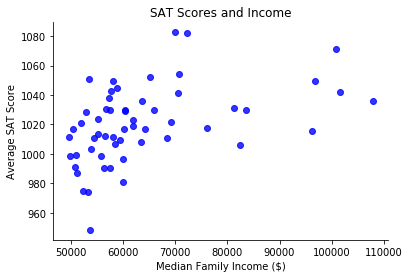

In [335]:
#Importing the relevant packages

import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import statsmodels.api as sm

#Creating the Scatter Plot

fig,ax = plt.subplots() 

y = merged_data['SAT Combined Average Score']
x = merged_data['Median Family income']

plt.scatter(x, y, color = 'b', alpha=0.8)

#Labelling 

plt.title('SAT Scores and Income')
plt.ylabel('Average SAT Score')
plt.xlabel('Median Family Income ($)')

#Line of Best Fit: I had tried to do this a number of ways, unfortunately it was not working out for some reason.
#                  Below is one of the codes i tried to use to make the plot. 

#from pylab import*
#(m,b) = polyfit(x,y,1)
#print(b)
#print(m)
#yp = polyval([m,b],1)
#plot(x,yp)
#grid(True)


#Aesthetic
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

#### Observations

From the table above there is a clear correation between the Median Family income and the average SAT score. As a family's income increases, the likelyhood of a higher SAT score increases. 

On the left side of the graph, there is much more clustering of the data. At the lower income levels, the avergae SAT scores have much greater variance, however they do not seem to completely eliminate the possibility of achieving a score comporable to that of the middle/higher earning populations. 

On the right side, there is much less clustering. This may be a reflection of the less number of families to be found at the higher income levels. The overall average SAT score is higher than that of lower income families. Above ~65,000 the average score does not fall below 1000 points. The likelyhood of getting a higher score increases.




## Conclusion

At higher income levels, the likelyhood of scoring better in the SAT's is much greater. With that, students are more likley to end up in better higher learning institutions, and in that achieve greater access to improve their economic standing. However, the difference observed is not substantial. As seen in the graph, there is hardly a difference between earning $50,000 and $60,000 overall. With regard to upper limits, the graph does not reflect a considerable difference between a family making $50,000 versus $80,000. So while there is a positive correlation, the actual income level seems to have little impact on SAT scores.


#### Limitations

In a study Mckiney and Company, New York State only ranks 19/50 by  with regard to quality of education. Therefore this may be an underlying issue with the study. Although the income level may increase, the actual quality of education may not increase as dramatically, unless someone goes to an elite school at the far right of the spectrum.

To lean closer to the truth, the scope of this project would have to broaden. By adding in more locations, the question of overall low quality education with New York State would be somewhat mitigated. Additionally this study does not relfect all the other differences that may come into play with regard to addressing ineqaulity, such as geography, transport, health, access to financial support, institutions etc. This project also does not consider the actual make up of the students. For instance, what is the difference by race, gender, ethnicity.

Finally, having a high SAT score is not a good enough determinate of getting into a high quality tetiary leaning instituion. It does not consider the impact of extra-curriculars, financial aid (whether at state level, school level or pell grant).

## END

In [340]:
##Below is an additonal step I would have like to take in the project
#I would have liked to take the information gathered and plotted it on a map of new york state. 
#In doing so, I may have been able to identify other pieces to the puzzle 
#Such as, where clustering of good education may happen - the city vs more rural areas. 
#Unfortunately, I was not able to combine the two pieces of code.

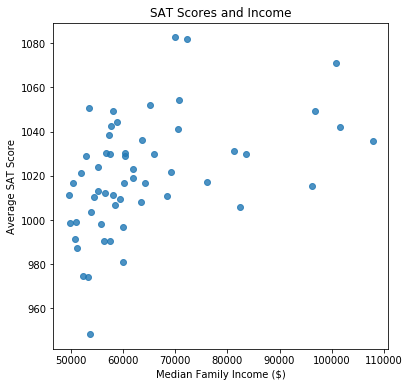

/Users/studentgovernment/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.

/Users/studentgovernment/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.



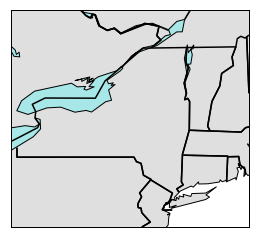

In [341]:
plt.figure(figsize=(6,6))

my_map = Basemap(projection='merc', # This is a simple one...some options require more input
                 resolution = 'l', area_thresh = 1000.0, # Same as above
                 llcrnrlon=-80, llcrnrlat=40, # This says "lower left hand cornoer lon, lower left hand corner lat
                 urcrnrlon=-71, urcrnrlat=46)  # This says upper right hand corner lon, upper right corner lat
                                              # Then it will draw a box given these specifications.
 
# Note given my starting point, I played alot with to find what I was looking for...
# For my Latin American friends, if you flip this the right way you can get the updside down
# perspective. 

#################################################################################################


y = merged_data['SAT Combined Average Score']
x = merged_data['Median Family income']

plt.scatter(x, y,alpha=0.8)
plt.title('SAT Scores and Income')
plt.ylabel('Average SAT Score')
plt.xlabel('Median Family Income ($)')



#Aesthetic
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

my_map.drawcoastlines()
my_map.drawcountries(linewidth=1.5) # Make the country lines bolder
my_map.fillcontinents(color='grey',alpha = 0.25,lake_color='aqua') # Fill in the lakes
my_map.drawmapboundary()
my_map.drawstates(linewidth=1.5)
   
plt.show()